In [ ]:
"""
    Fake testing records
    1. Boxplot all
        s_off_g
        s_on_g
        s_in
        s_out
        s_saves
        s_blocked
        c_yellow
        goals_home
        goals_away
    2. Boxplot per team
        2.1 Boxplot per team home
        2.2 Boxplot per team away
"""

In [4]:
import pandas as pd
import numpy as np

In [29]:
def clean_data(df):
    df = df.drop(df.columns[0], axis=1)
    df = df.drop(columns=["league","id"], axis=1)
    # Just fixtures statistics + names
    df["home_team.name"] = df["team_home.team.name"]
    df["home_team.id"] = df["team_home.team.id"]
    df["away_team.name"] = df["team_away.team.name"]
    df["away_team.id"] = df["team_away.team.id"]
    df = df.drop(df.filter(regex='team_away').columns, axis=1)
    df = df.drop(df.filter(regex='team_home.').columns, axis=1)
    df["stats_away.p_percentage"] = df["stats_away.p_accurate"]/df["stats_away.p_total"]
    df["stats_home.p_percentage"] = df["stats_home.p_accurate"]/df["stats_home.p_total"]
    # None values set to 0
    df.fillna(value=0, inplace=True)
    # Posession % to decimal
    df["stats_away.possession"] = df["stats_away.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
    df["stats_home.possession"] = df["stats_home.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
    return df

In [30]:
def subset_data(data):
    new_data = pd.DataFrame()
    new_data["home_team.name"] = data["home_team.name"]
    new_data["home_team.id"] = data["home_team.id"]
    new_data["away_team.name"] = data["away_team.name"]
    new_data["away_team.id"] = data["away_team.id"]
    new_data["stats_home.s_on_g"] = data["stats_home.s_on_g"]
    new_data["stats_away.s_on_g"] = data["stats_away.s_on_g"]
    new_data["stats_home.s_off_g"] = data["stats_home.s_off_g"]
    new_data["stats_away.s_off_g"] = data["stats_away.s_off_g"]
    new_data["stats_home.s_in"] = data["stats_home.s_in"]
    new_data["stats_away.s_in"] = data["stats_away.s_in"]
    new_data["stats_home.s_out"] = data["stats_home.s_out"]
    new_data["stats_away.s_out"] = data["stats_away.s_out"]
    new_data["stats_home.s_blocked"] = data["stats_home.s_blocked"]
    new_data["stats_away.s_blocked"] = data["stats_away.s_blocked"]
    new_data["stats_home.saves"] = data["stats_home.saves"]
    new_data["stats_away.saves"] = data["stats_away.saves"]
    new_data["stats_away.c_yellow"] = data["stats_away.c_yellow"]
    new_data["stats_home.c_yellow"] = data["stats_home.c_yellow"]
    new_data["goals_home"] = data["goals_home"]
    new_data["goals_away"] = data["goals_away"]
    return new_data

In [31]:
def df_season(country, league, season, week, drop_goals=True):
    dirCountry = '../' + country + '/'
    dirName = dirCountry + league + '/' + str(season) + '/'
    file_title = str(season) + '_' + str(week) + '.csv'
    csv_file = dirName + file_title
    df = pd.read_csv(csv_file)
    df = clean_data(df)
    if drop_goals:
        df = df.drop(columns=["goals_away","goals_home"], axis=1) 
    return df

In [32]:
# League directory
country = 'ES'
league = '140'
curr_week = 38
season = 2019

In [44]:
# Data initialization
df = df_season(country, league, season, curr_week, drop_goals=False)

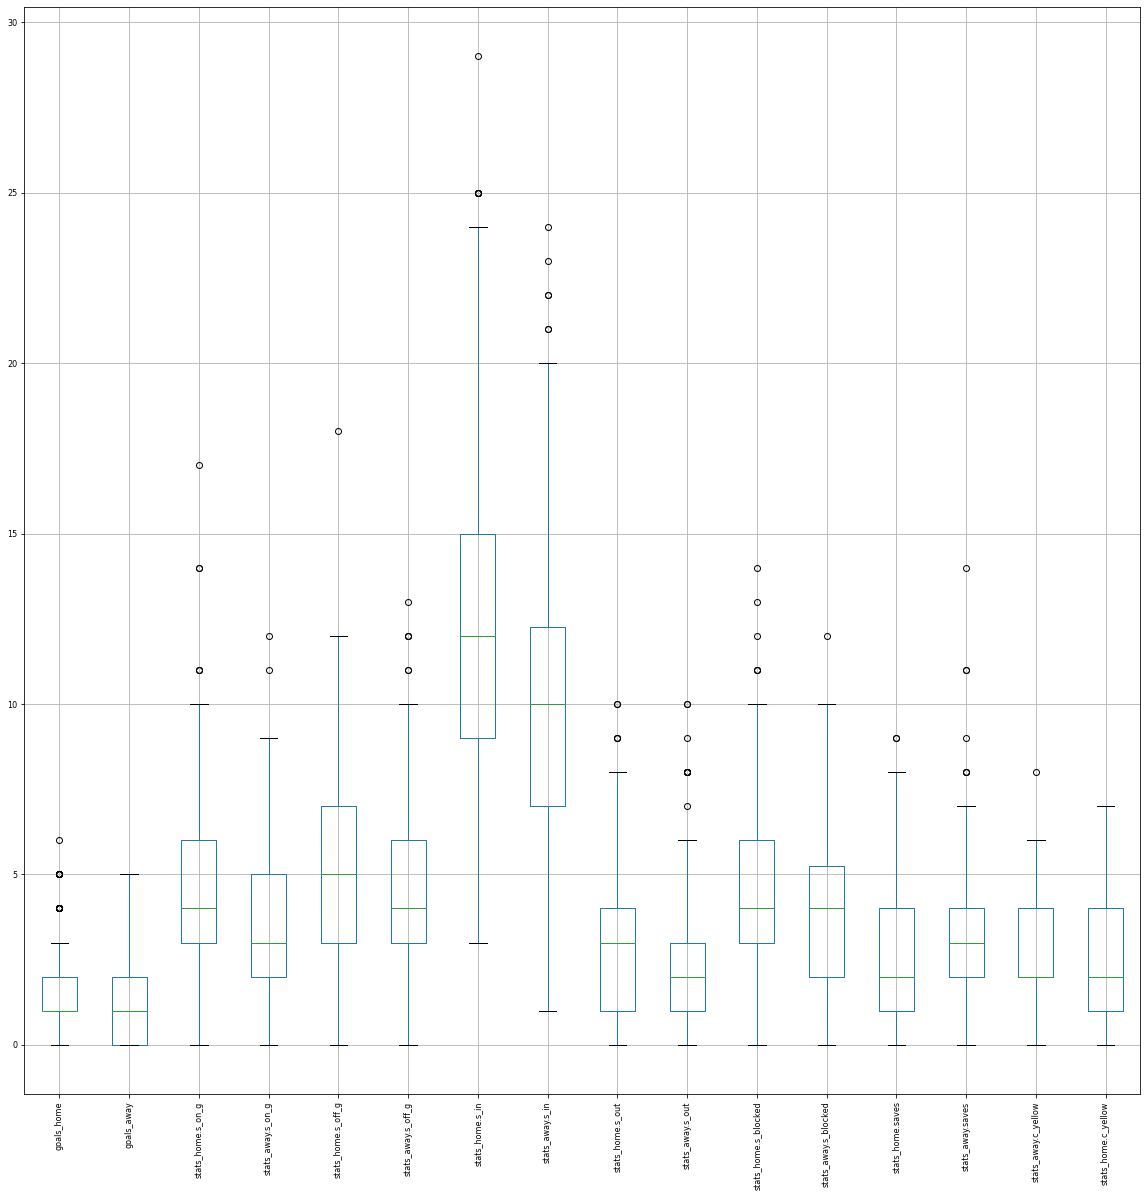

In [45]:
new_df = subset_data(df)
column = ['goals_home', 'goals_away']
column = column + new_df.filter(regex='stats').columns.tolist()
boxplot = new_df.boxplot(column=column, rot=90, fontsize=8, figsize=(20,20))

In [57]:
new_df.skew()

home_team.id            1.630242
away_team.id            1.630242
stats_home.s_on_g       1.000455
stats_away.s_on_g       0.553985
stats_home.s_off_g      0.703876
stats_away.s_off_g      0.741968
stats_home.s_in         0.448800
stats_away.s_in         0.525615
stats_home.s_out        0.783140
stats_away.s_out        1.135148
stats_home.s_blocked    0.576733
stats_away.s_blocked    0.584700
stats_home.saves        0.696681
stats_away.saves        1.116425
stats_away.c_yellow     0.359632
stats_home.c_yellow     0.413779
goals_home              0.896277
goals_away              0.996284
dtype: float64

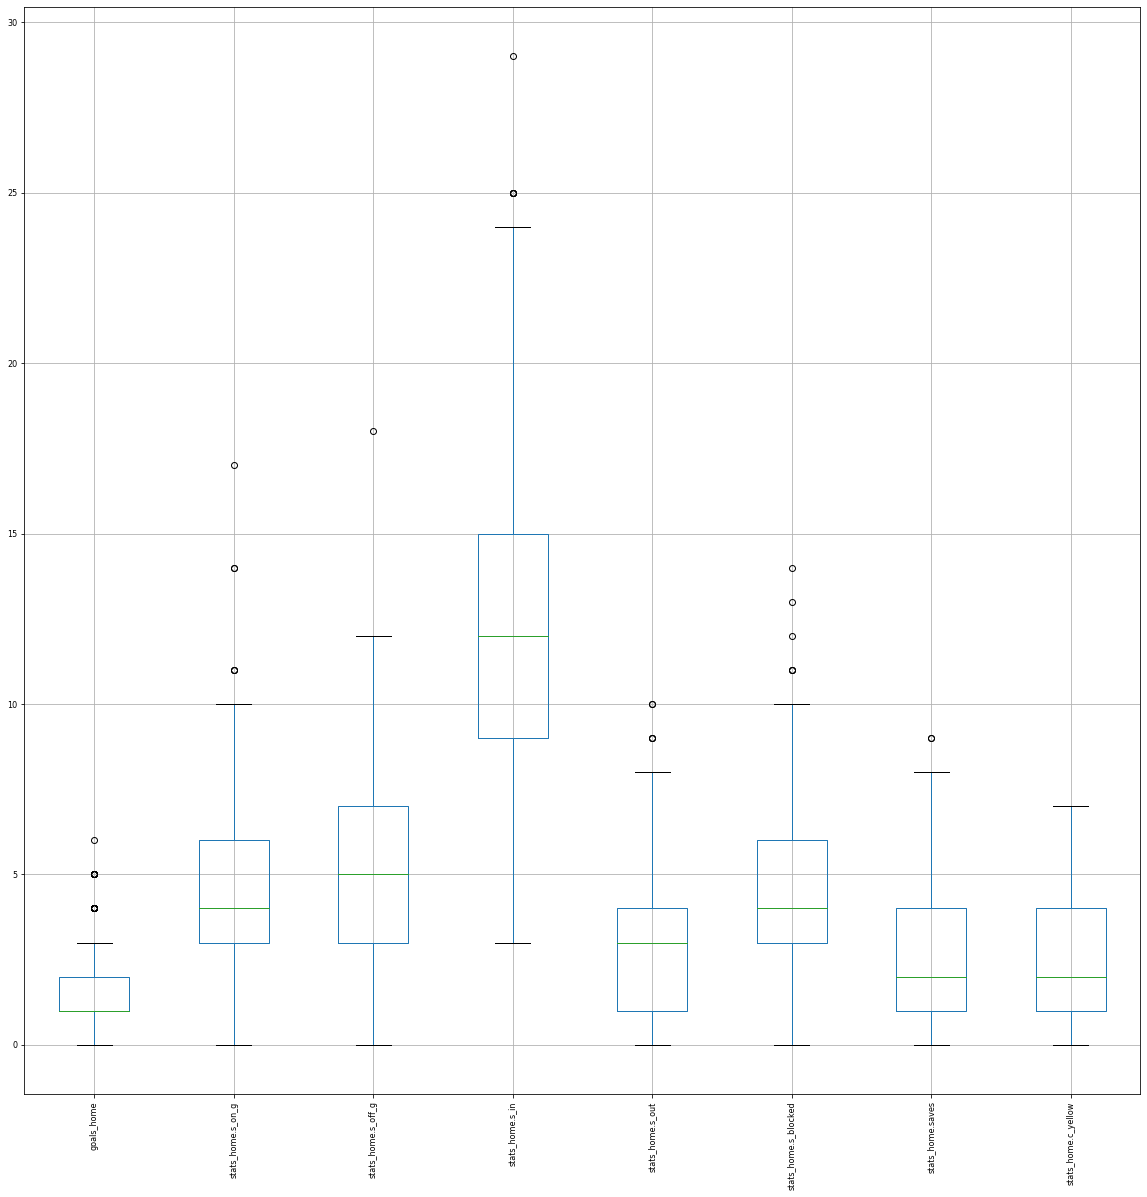

In [56]:
# Skewed to the right the mean is greater than the median
# Better to test with median
new_df = subset_data(df)
column = ['goals_home']
column = column + new_df.filter(regex='stats_home.').columns.tolist()
boxplot = new_df.boxplot(column=column, rot=90, fontsize=8, figsize=(20,20))

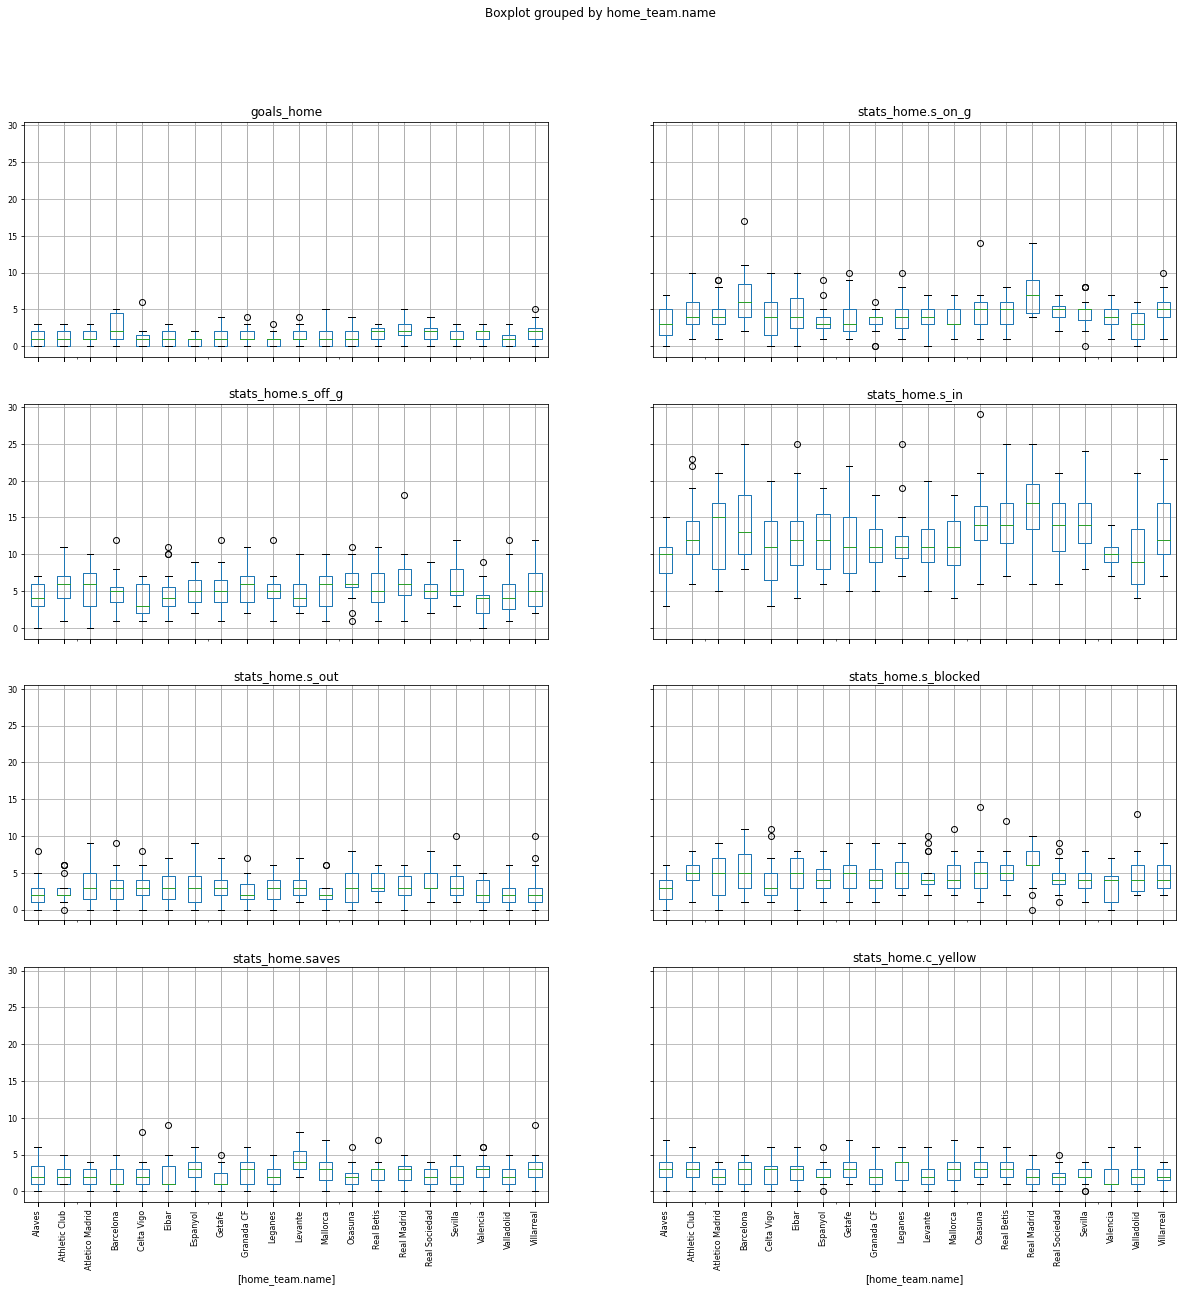

In [59]:
column = ['goals_home']
column = column + new_df.filter(regex='stats_home.').columns.tolist()
boxplot = new_df.boxplot(column=column, rot=90, fontsize=8, figsize=(20,20), by=['home_team.name'],
                         layout=(4, 2))

In [60]:
# Use quartile 50% which is median
new_df.groupby('home_team.name')[column].describe()

goals_home                                               \
                     count      mean       std  min  25%  50%  75%  max   
home_team.name                                                            
Alaves                19.0  1.052632  0.911268  0.0  0.0  1.0  2.0  3.0   
Athletic Club         19.0  1.105263  0.994135  0.0  0.0  1.0  2.0  3.0   
Atletico Madrid       19.0  1.473684  1.073334  0.0  1.0  1.0  2.0  3.0   
Barcelona             19.0  2.736842  1.758854  0.0  1.0  2.0  4.5  5.0   
Celta Vigo            19.0  1.157895  1.384965  0.0  0.0  1.0  1.5  6.0   
Eibar                 19.0  1.315789  1.157230  0.0  0.0  1.0  2.0  3.0   
Espanyol              19.0  0.789474  0.787327  0.0  0.0  1.0  1.0  2.0   
Getafe                19.0  1.315789  1.376494  0.0  0.0  1.0  2.0  4.0   
Granada CF            19.0  1.368421  1.011628  0.0  1.0  1.0  2.0  4.0   
Leganes               19.0  0.894737  0.875261  0.0  0.0  1.0  1.0  3.0   
Levante               19.0  1.421053  1.121298  0.0  1.0  1.0  2.0  4.0   
Mallorca              19.0  1.315789  1.454977  0.0  0.0  1.0  2.0  5.0   
Osasuna               19.0  1.368421  1.211543  0.0  0.0  1.0  2.0  4.0   
Real Betis            19.0  1.789474  0.917663  0.0  1.0  2.0  2.5  3.0   
Real Madrid           19.0  2.105263  1.242521  0.0  1.5  2.0  3.0  5.0   
Real Sociedad         19.0  1.736842  1.097578  0.0  1.0  2.0  2.5  4.0   
Sevilla               19.0  1.368421  0.830698  0.0  1.0  1.0  2.0  3.0   
Valencia              19.0  1.526316  0.696692  0.0  1.0  2.0  2.0  3.0   
Valladolid            19.0  0.947368  0.911268  0.0  0.0  1.0  1.5  3.0   
Villarreal            19.0  1.947368  1.432701  0.0  1.0  2.0  2.5  5.0   

                stats_home.s_on_g            ... stats_home.saves       \
                            count      mean  ...              75%  max   
home_team.name                               ...                         
Alaves                       19.0  3.000000  ...              3.5  6.0   
Athletic Club                19.0  4.421053  ...              3.0  5.0   
Atletico Madrid              19.0  4.210526  ...              3.0  4.0   
Barcelona                    19.0  6.473684  ...              3.0  5.0   
Celta Vigo                   19.0  4.052632  ...              3.0  8.0   
Eibar                        19.0  4.210526  ...              3.5  9.0   
Espanyol                     19.0  3.526316  ...              4.0  6.0   
Getafe                       19.0  3.894737  ...              2.5  5.0   
Granada CF                   19.0  3.368421  ...              4.0  6.0   
Leganes                      19.0  4.105263  ...              3.0  5.0   
Levante                      19.0  3.789474  ...              5.5  8.0   
Mallorca                     19.0  3.631579  ...              4.0  7.0   
Osasuna                      19.0  4.789474  ...              2.5  6.0   
Real Betis                   19.0  4.894737  ...              3.0  7.0   
Real Madrid                  19.0  7.105263  ...              3.5  5.0   
Real Sociedad                19.0  4.631579  ...              3.0  4.0   
Sevilla                      19.0  4.578947  ...              3.5  5.0   
Valencia                     19.0  3.947368  ...              3.5  6.0   
Valladolid                   19.0  3.052632  ...              3.0  5.0   
Villarreal                   19.0  5.052632  ...              4.0  9.0   

                stats_home.c_yellow                                          \
                              count      mean       std  min  25%  50%  75%   
home_team.name                                                                
Alaves                         19.0  3.263158  1.557851  0.0  2.0  3.0  4.0   
Athletic Club                  19.0  2.736842  1.521772  0.0  2.0  3.0  4.0   
Atletico Madrid                19.0  2.000000  1.201850  0.0  1.0  2.0  3.0   
Barcelona                      19.0  2.421053  1.709964  0.0  1.0  3.0  4.0   
Celta Vigo                     19.

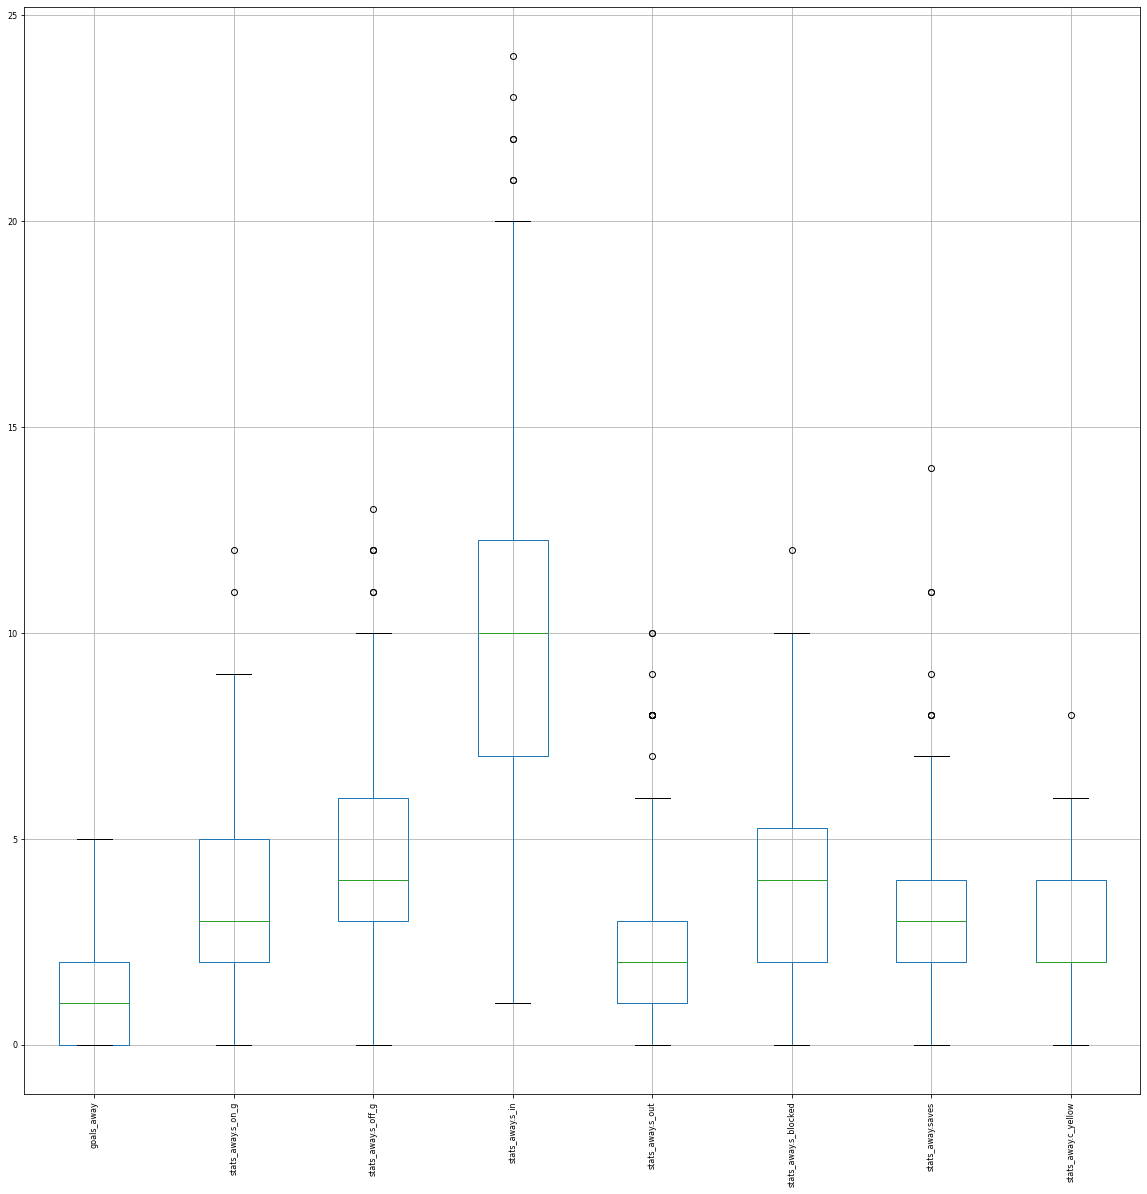

In [61]:
column = ['goals_away']
column = column + new_df.filter(regex='stats_away.').columns.tolist()
boxplot = new_df.boxplot(column=column, rot=90, fontsize=8, figsize=(20,20))

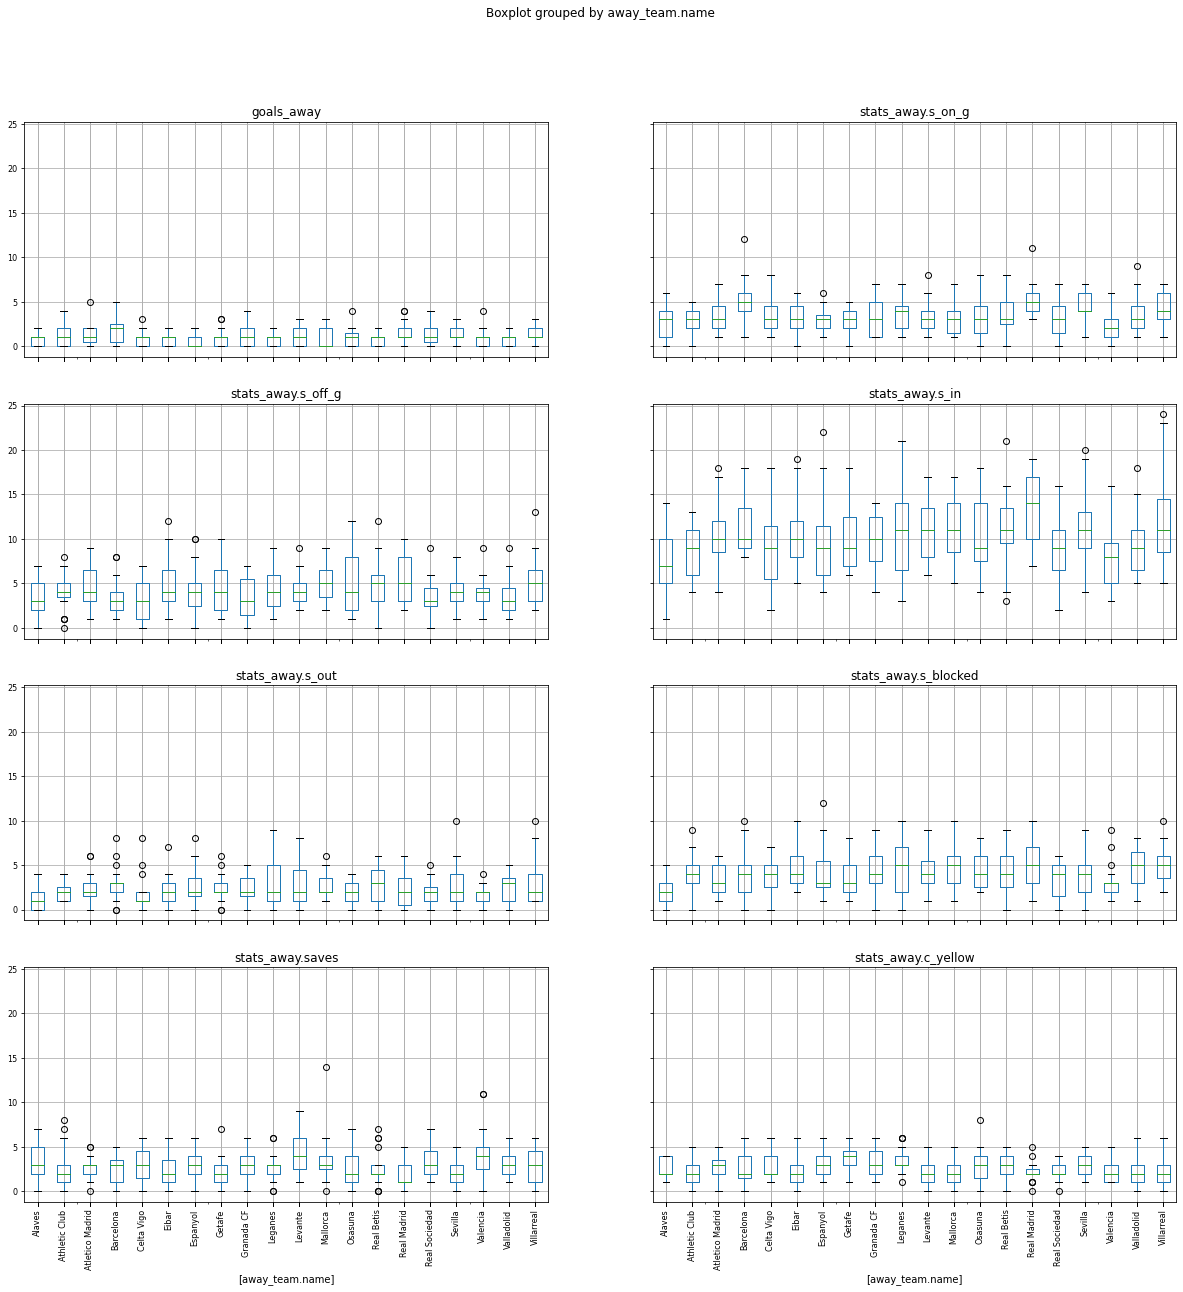

In [42]:
column = ['goals_away']
column = column + new_df.filter(regex='stats_away.').columns.tolist()
boxplot = new_df.boxplot(column=column, rot=90, fontsize=8, figsize=(20,20), by=['away_team.name'],
                         layout=(4, 2))

In [62]:
new_df.groupby('away_team.name')[column].describe()

goals_away                                               \
                     count      mean       std  min  25%  50%  75%  max   
away_team.name                                                            
Alaves                19.0  0.736842  0.733493  0.0  0.0  1.0  1.0  2.0   
Athletic Club         19.0  1.052632  1.078769  0.0  0.0  1.0  2.0  4.0   
Atletico Madrid       19.0  1.210526  1.182227  0.0  0.5  1.0  2.0  5.0   
Barcelona             19.0  1.789474  1.512134  0.0  0.5  2.0  2.5  5.0   
Celta Vigo            19.0  0.789474  0.854982  0.0  0.0  1.0  1.0  3.0   
Eibar                 19.0  0.736842  0.805682  0.0  0.0  1.0  1.0  2.0   
Espanyol              19.0  0.631579  0.760886  0.0  0.0  0.0  1.0  2.0   
Getafe                19.0  0.947368  0.970320  0.0  0.0  1.0  1.0  3.0   
Granada CF            19.0  1.368421  1.300022  0.0  0.0  1.0  2.0  4.0   
Leganes               19.0  0.684211  0.749269  0.0  0.0  1.0  1.0  2.0   
Levante               19.0  1.052632  1.025978  0.0  0.0  1.0  2.0  3.0   
Mallorca              19.0  0.789474  1.031662  0.0  0.0  0.0  2.0  3.0   
Osasuna               19.0  1.052632  1.025978  0.0  0.0  1.0  1.5  4.0   
Real Betis            19.0  0.736842  0.805682  0.0  0.0  1.0  1.0  2.0   
Real Madrid           19.0  1.578947  1.261207  0.0  1.0  1.0  2.0  4.0   
Real Sociedad         19.0  1.210526  1.084176  0.0  0.5  1.0  2.0  4.0   
Sevilla               19.0  1.473684  0.841191  0.0  1.0  1.0  2.0  3.0   
Valencia              19.0  0.894737  1.048530  0.0  0.0  1.0  1.0  4.0   
Valladolid            19.0  0.736842  0.733493  0.0  0.0  1.0  1.0  2.0   
Villarreal            19.0  1.368421  0.760886  0.0  1.0  1.0  2.0  3.0   

                stats_away.s_on_g            ... stats_away.saves        \
                            count      mean  ...              75%   max   
away_team.name                               ...                          
Alaves                       19.0  2.473684  ...              5.0   7.0   
Athletic Club                19.0  2.789474  ...              3.0   8.0   
Atletico Madrid              19.0  3.421053  ...              3.0   5.0   
Barcelona                    19.0  5.263158  ...              3.5   5.0   
Celta Vigo                   19.0  3.526316  ...              4.5   6.0   
Eibar                        19.0  3.263158  ...              3.5   6.0   
Espanyol                     19.0  3.000000  ...              4.0   6.0   
Getafe                       19.0  2.894737  ...              3.0   7.0   
Granada CF                   19.0  3.368421  ...              4.0   6.0   
Leganes                      19.0  3.789474  ...              3.0   6.0   
Levante                      19.0  3.473684  ...              6.0   9.0   
Mallorca                     19.0  3.157895  ...              4.0  14.0   
Osasuna                      19.0  3.157895  ...              4.0   7.0   
Real Betis                   19.0  3.578947  ...              3.0   7.0   
Real Madrid                  19.0  5.315789  ...              3.0   5.0   
Real Sociedad                19.0  3.105263  ...              4.5   7.0   
Sevilla                      19.0  4.578947  ...              3.0   5.0   
Valencia                     19.0  2.368421  ...              5.0  11.0   
Valladolid                   19.0  3.421053  ...              4.0   6.0   
Villarreal                   19.0  4.157895  ...              4.5   6.0   

                stats_away.c_yellow                                          \
                              count      mean       std  min  25%  50%  75%   
away_team.name                                                                
Alaves                         19.0  2.578947  1.169795  1.0  2.0  2.0  4.0   
Athletic Club                  19.0  2.000000  1.490712  0.0  1.0  2.0  3.0   
Atletico Madrid                19.0  2.894737  1.328940  0.0  2.0  3.0  3.5   
Barcelona                      19.0  2.421053  1.709964  0.0  1.5  2.0  4.0   
Celta Vigo 